cargamos los datos de la carpeta raw data

los limpiamos y una vez qeue esten listos para pasarselos a los modelos:
los guardamos en la carpeta precessed data

y guardamos el objeto de limpieza en la carpeta models


In [31]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import nltk     
import re
import string
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import graphviz 
from sklearn import tree
from sklearn import metrics
from wordcloud import WordCloud
import xgboost as xgb

In [32]:


file_path = r"C:\Users\lunai\OneDrive\Escritorio\capstone1\capstone\data\raw\SMSSpamCollection"

# Utiliza \t como delimitador
sms = pd.read_csv(file_path, sep="\t", header=None, names=["Label", "SMS"])
sms.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
sms['lenght'] = sms['SMS'].apply(len)

In [34]:
sms['Label'] = sms['Label'].map({'ham': 0, 'spam': 1})
sms.head()

,Label,SMS,lenght
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
sms['SMS'] = sms['SMS'].str.lower()

In [36]:
def transformations(transformations):
    if transformations == "NA":
        return "NA"
    else:
      transformations = re.sub(r'\b(u)\b','you', transformations)
      transformations = re.sub(r'\b(2)\b', 'to',transformations)
      transformations = re.sub(r'\b(i\' m)\b', 'i am', transformations)
      transformations = re.sub(r'\b(cant)\b', 'can not', transformations)
      transformations = re.sub(r'\b(thats)\b', 'that is', transformations)
      transformations = re.sub(r'\b(im)\b', 'i am', transformations)
      transformations = re.sub(r'\b(ill)\b', 'i will', transformations)
      transformations = re.sub(r'\b(ur)\b', 'your', transformations)
      transformations = re.sub(r'\b(4)\b', 'for', transformations)
      transformations = re.sub(r'\b(n)\b', 'no', transformations)
      transformations = re.sub(r'\b(i\'ll)\b', 'i will', transformations)
      transformations = re.sub(r'\b(ü)\b', 'you', transformations)
      transformations = re.sub(r'\b(&)\b', 'and', transformations)
      transformations = re.sub(r'\b(txt)\b', 'text', transformations)
      transformations = re.sub(r'\b(1)\b', 'one', transformations)
      transformations = re.sub(r'\b(po)\b', 'purchase order', transformations)
      transformations = re.sub(r'\b(dont)\b', 'do not', transformations)
      transformations = re.sub(r'\b(don\'t)\b', 'do not', transformations)
      transformations = re.sub(r'\b(lor)\b', 'lot', transformations)
      transformations = re.sub(r'\b(msg)\b', 'message', transformations)
      transformations = re.sub(r'\b(wat)\b', 'what', transformations)
      transformations = re.sub(r'\b(na)\b', 'not available', transformations)
      transformations = re.sub(r'\b(pls)\b', 'please', transformations)
      transformations = re.sub(r'\b(wkly)\b', 'weekly', transformations)
      transformations = re.sub(r'\b(i\'d)\b', 'i would', transformations)
      transformations = re.sub(r'\b(2nd)\b', 'second', transformations)
      transformations = re.sub(r'\b(usf)\b', 'university of south florida', transformations)
      transformations = re.sub(r'\b(hor)\b', 'hour', transformations)
      transformations = re.sub(r'\b(fr)\b', 'for', transformations)
      transformations = re.sub(r'\b(gt)\b', 'get', transformations)
      transformations = re.sub(r'\b(lt)\b', 'let', transformations)
      transformations = re.sub(r'\b(comp)\b', 'composition', transformations)
      transformations = re.sub(r'\b(go)\b', 'gone', transformations)
      transformations = re.sub(r'\b(wan)\b', 'want', transformations)
      transformations = re.sub(r'\b(mob)\b', 'mobile', transformations)
      transformations = re.sub(r'\b(\'s)\b', 'is', transformations)
      transformations = re.sub(r'\b(m)\b', 'i am', transformations)
      transformations = re.sub(r'\b(ll)\b', 'will', transformations)
      transformations = re.sub(r'\b(its)\b', 'it is', transformations)
      transformations = re.sub(r'\b(itis)\b', 'it is', transformations)
      transformations = re.sub(r'\b(i\'i)\b', 'i', transformations)
      transformations = re.sub(r'\b(cos)\b', 'because', transformations)





    return transformations

# Aplicar la función a la columna 'SMS' y sobrescribir el resultado
sms['SMS'] = sms['SMS'].apply(transformations)

In [37]:
# Palabras a eliminar
words_to_remove = ["&let;#&get;", "&amp;"]

# Reemplazar las palabras en la columna 'SMS'
sms['SMS'] = sms['SMS'].replace(words_to_remove, '', regex=True)

# Visualizar el DataFrame resultante
print(sms)

      Label                                                SMS  lenght
0         0  gone until jurong point, crazy.. available onl...     111
1         0                    ok lar... joking wif you oni...      29
2         1  free entry in to a weekly composition to win f...     155
3         0  you dun say so early hour... you c already the...      49
4         0  nah i do not think he goes to university of so...      61
...     ...                                                ...     ...
5567      1  this is the second time we have tried to conta...     160
5568      0            will you b going to esplanade for home?      36
5569      0  pity, * was in mood for that. so...any other s...      57
5570      0  the guy did some bitching but i acted like i w...     125
5571      0                     rofl. it is true to it is name      26

[5572 rows x 3 columns]


In [38]:
#Define una función para realizar la lematización. Esta función tomará una lista de palabras y las lematizará. Además, se necesita una función para asignar las etiquetas de parte de habla (POS) antes de la lematización. Las etiquetas POS son necesarias para que el proceso de lematización sea más preciso.

def get_wordnet_pos(word):
    """Mapea las etiquetas POS de NLTK a etiquetas de WordNet."""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_words(words):
    """Realiza la lematización de una lista de palabras."""
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]

#Carga tus datos en un DataFrame de Pandas.

#Aplica la lematización a la columna que contiene el texto. A continuación, se muestra cómo hacerlo:

sms['lemmatized_text'] = sms['SMS'].apply(lambda x: lemmatize_words(nltk.word_tokenize(x)))
#Donde df es tu DataFrame, 'text_column' es la columna que contiene el texto que deseas lematizar, y 'lemmatized_text' es la columna en la que se almacenarán los resultados de la lematización.

#Con estos pasos, habrás realizado la lematización de tu texto en Pandas utilizando NLTK. Recuerda ajustar las etiquetas POS según tus necesidades, ya que pueden variar según el contexto de tu texto.


In [39]:
# Descargar las stopwords en inglés si no están descargadas
nltk.download('stopwords')

# Obtener las stopwords en inglés
stop_words = set(stopwords.words('english'))

# Definir una función para remover stopwords
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Aplicar la función a la columna 'SMS' y crear una nueva columna 'SMS_without_stopwords'
sms['SMS_without_stopwords'] = sms['SMS'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lunai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
sms.head(2)

,Label,SMS,lenght,lemmatized_text,SMS_without_stopwords
0,0,"gone until jurong point, crazy.. available onl...",111,"[go, until, jurong, point, ,, crazy, .., avail...","gone jurong point, crazy.. available bugis gre..."
1,0,ok lar... joking wif you oni...,29,"[ok, lar, ..., joking, wif, you, oni, ...]",ok lar... joking wif oni...


In [41]:
sms['processed_text'] = sms['SMS']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lunai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


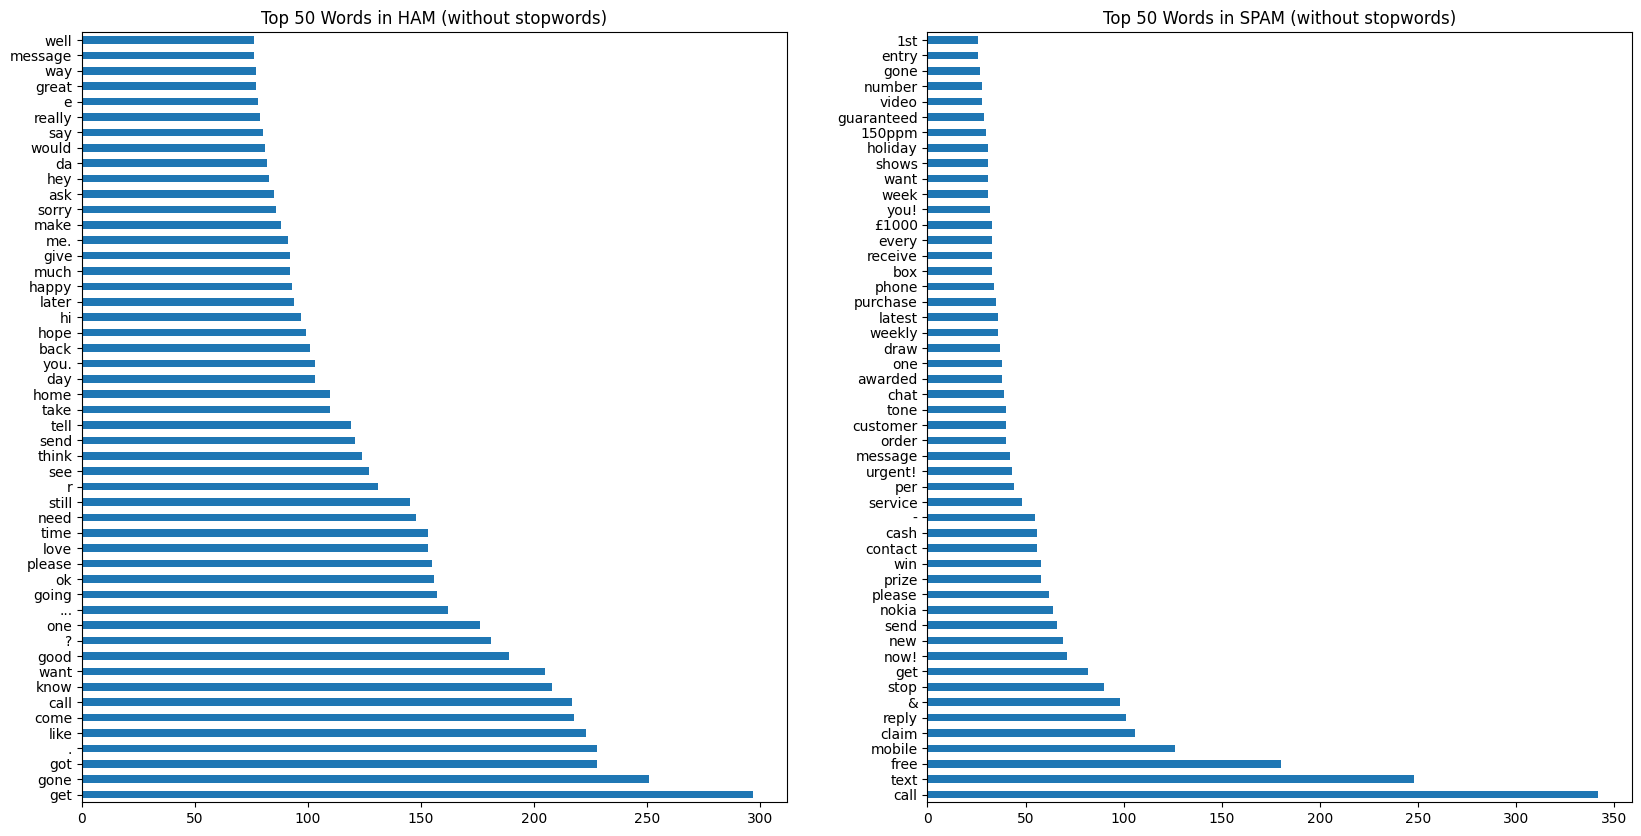

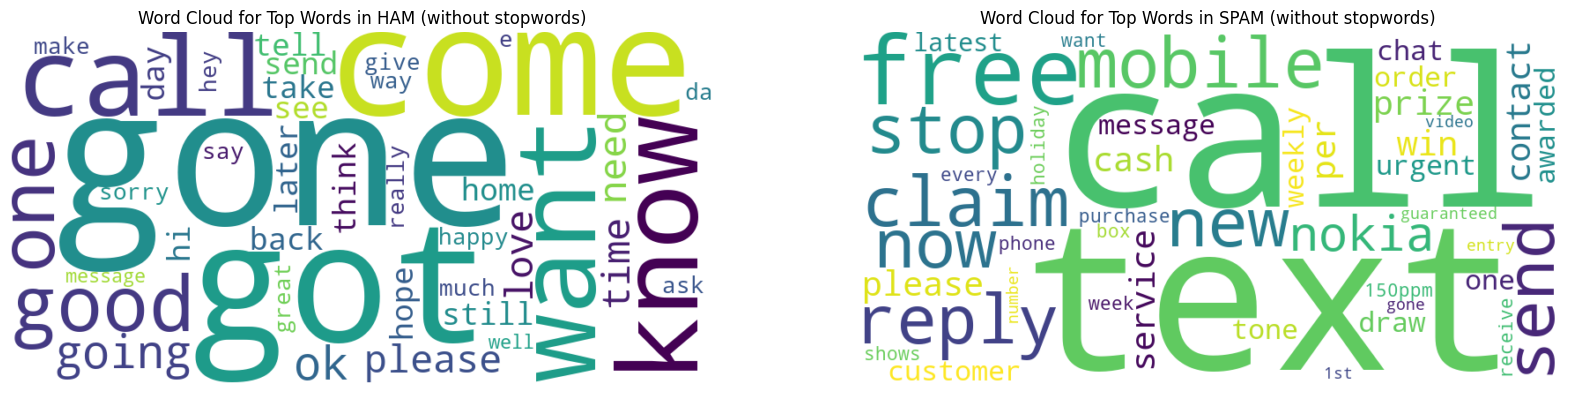

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
import pandas as pd

nltk.download('stopwords')

# Definir las stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para obtener las palabras más frecuentes excluyendo stopwords
def top_words(series, n=50):
    all_words = ' '.join(series).split()
    word_counts = pd.Series(all_words).value_counts()
    # Excluir stopwords
    word_counts = word_counts[~word_counts.index.isin(stop_words)]
    return word_counts.head(n)

# Realizar el gráfico de barras original
grouped = sms.groupby('Label')

ham_top_words = top_words(grouped.get_group(0)['processed_text'])
spam_top_words = top_words(grouped.get_group(1)['processed_text'])

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
ham_top_words.plot(kind='barh', ax=axes[0], title='Top 50 Words in HAM (without stopwords)')
spam_top_words.plot(kind='barh', ax=axes[1], title='Top 50 Words in SPAM (without stopwords)')

plt.show()

# Crear nubes de etiquetas basadas en las palabras más frecuentes sin stopwords
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ham_top_words.index))
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_top_words.index))

# Mostrar las nubes de etiquetas
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(ham_wordcloud, interpolation='bilinear')
axes[0].set_title('Word Cloud for Top Words in HAM (without stopwords)')
axes[0].axis('off')

axes[1].imshow(spam_wordcloud, interpolation='bilinear')
axes[1].set_title('Word Cloud for Top Words in SPAM (without stopwords)')
axes[1].axis('off')

plt.show()

C:\Users\lunai\AppData\Local\Temp\ipykernel_19796\114861667.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].text(v, i, f'{v} ({ham_percentages[i]:.2f}%)', color='black', va='center')
C:\Users\lunai\AppData\Local\Temp\ipykernel_19796\114861667.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[1].text(v, i, f'{v} ({spam_percentages[i]:.2f}%)', color='black', va='center')


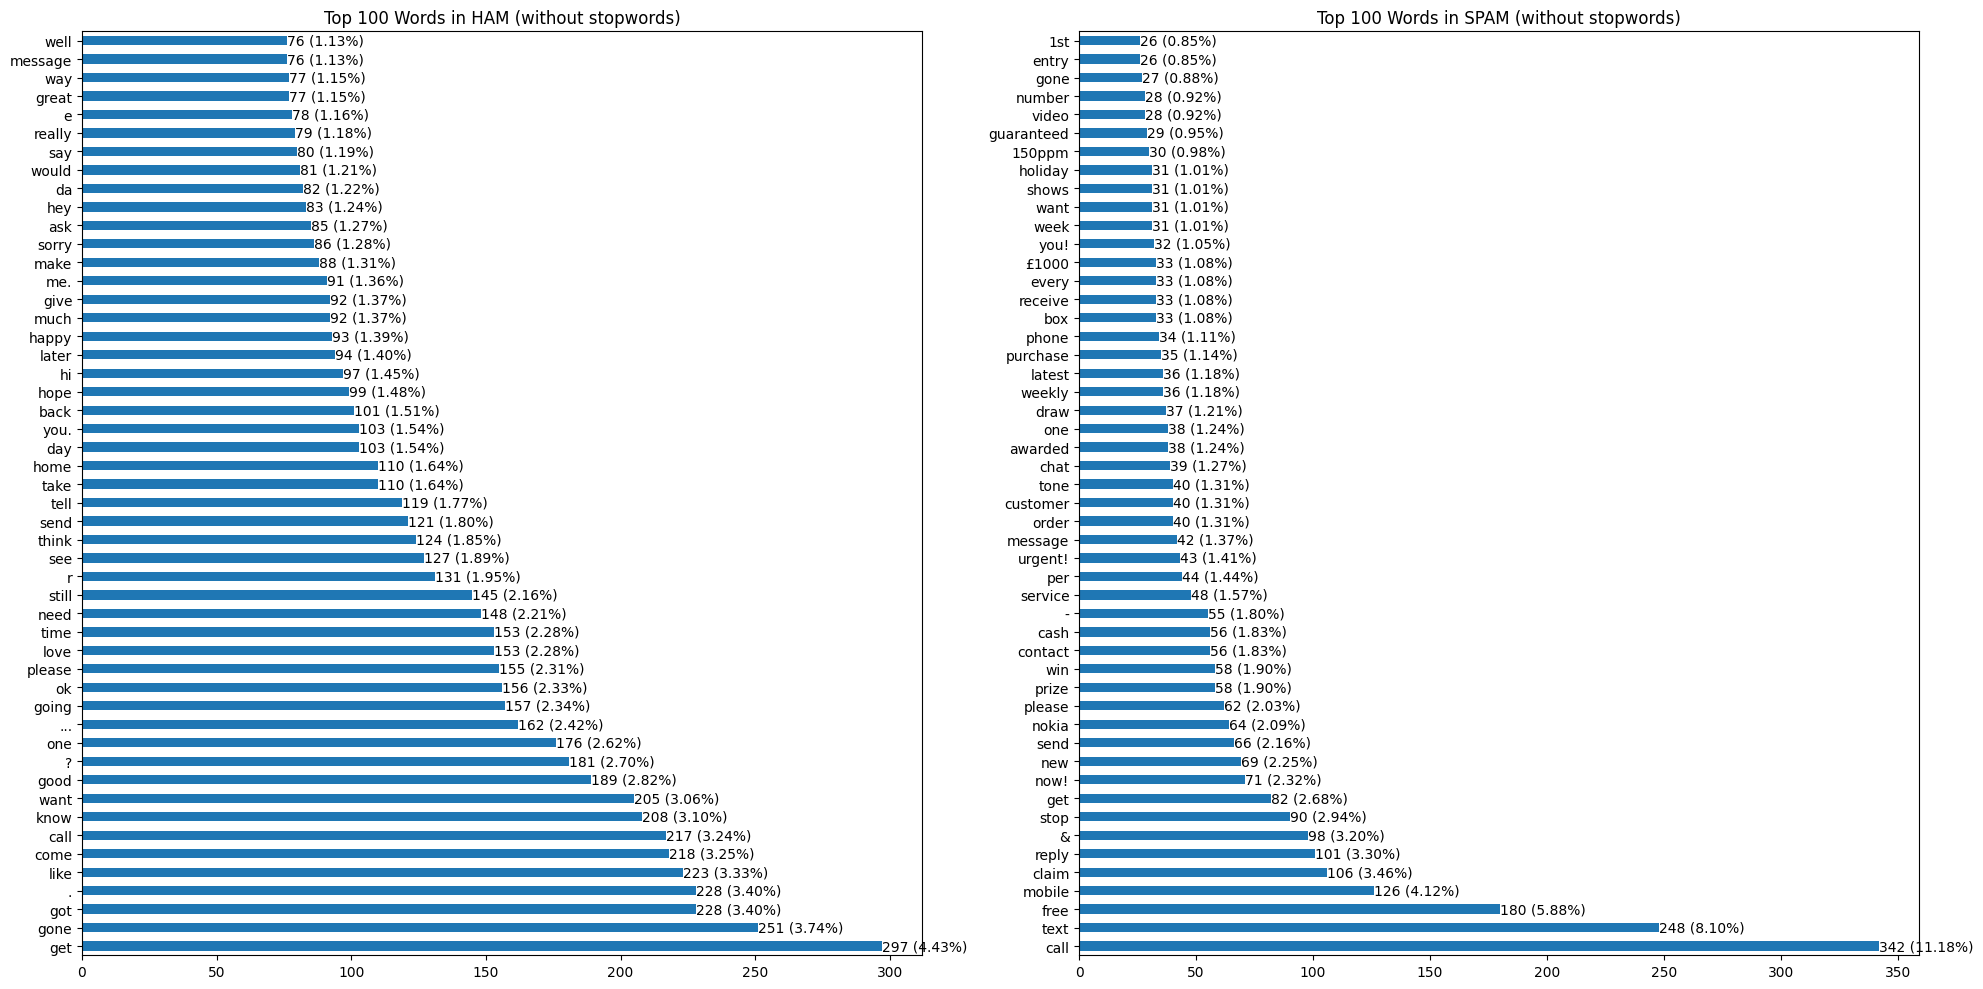

In [43]:

# Obtener el total de palabras en cada grupo (SPAM y HAM)
total_ham_words = ham_top_words.sum()
total_spam_words = spam_top_words.sum()

# Calcular los porcentajes de cada palabra en relación con el total de palabras en cada grupo
ham_percentages = (ham_top_words / total_ham_words) * 100
spam_percentages = (spam_top_words / total_spam_words) * 100

# Realizar el gráfico con los porcentajes
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Gráfico para HAM con porcentajes
ham_top_words.plot(kind='barh', ax=axes[0], title='Top 100 Words in HAM (without stopwords)')
for i, v in enumerate(ham_top_words):
    axes[0].text(v, i, f'{v} ({ham_percentages[i]:.2f}%)', color='black', va='center')

# Gráfico para SPAM con porcentajes
spam_top_words.plot(kind='barh', ax=axes[1], title='Top 100 Words in SPAM (without stopwords)')
for i, v in enumerate(spam_top_words):
    axes[1].text(v, i, f'{v} ({spam_percentages[i]:.2f}%)', color='black', va='center')

plt.tight_layout()
plt.show()

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descargar las stopwords de NLTK (si aún no las tienes)
import nltk
nltk.download('stopwords')

# Supongamos que ya tienes las variables ham_top_words, spam_top_words, total_ham_words y total_spam_words definidas

# Obtener listas de palabras para HAM y SPAM y eliminar stopwords
stop_words = set(stopwords.words('english'))

ham_words = set(ham_top_words.index) - stop_words
spam_words = set(spam_top_words.index) - stop_words

# Encontrar palabras que están en ambas listas
common_words = ham_words.intersection(spam_words)

# Calcular porcentaje de palabras comunes en relación con HAM y SPAM
common_words_percentage_ham = sum(ham_top_words[word] for word in common_words) / total_ham_words * 100
common_words_percentage_spam = sum(spam_top_words[word] for word in common_words) / total_spam_words * 100

# Crear un DataFrame con las columnas de palabras de HAM, palabras de SPAM y diferencia con porcentaje
data = {
    'Word': list(common_words),
    'HAM Words Percentage': [ham_top_words[word] / total_ham_words * 100 for word in common_words],
    'SPAM Words Percentage': [spam_top_words[word] / total_spam_words * 100 for word in common_words],
}

df = pd.DataFrame(data)

# Agregar columna de diferencia porcentual
df['Diferencia_porcentual'] = df['HAM Words Percentage'] - df['SPAM Words Percentage']

# Ordenar el DataFrame por la columna de diferencia porcentual de mayor a menor, manteniendo las palabras como índices
df = df.set_index('Word').sort_values(by='Diferencia_porcentual', ascending=False)

# Imprimir el DataFrame
print(df)

         HAM Words Percentage  SPAM Words Percentage  Diferencia_porcentual
Word                                                                       
gone                 3.743475               0.882353               2.861122
want                 3.057420               1.013072               2.044348
get                  4.429530               2.679739               1.749792
one                  2.624907               1.241830               1.383077
please               2.311708               2.026144               0.285564
message              1.133482               1.372549              -0.239067
send                 1.804623               2.156863              -0.352239
call                 3.236391              11.176471              -7.940080


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lunai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
#Para entrenar un modelo de regresión logística, necesitas convertir tus datos de texto en
#características numéricas. Puedes hacer esto utilizando un enfoque de "bag of words"
#(bolsa de palabras) con CountVectorizer:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sms['SMS'])
tamanio_X = X.size
X_new=['gone','want','get','one','please','message','send','call']
#X_new=["want","get"]
#X_new=['gone','want','get','one','call']
list_key=list(range(8))
new_columns = list_key[0:8]
X_new=X[new_columns]

In [61]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Supongamos que ya tienes 'sms1' y 'list_key' definidos
# También, supongo que 'sms1' es un DataFrame de Pandas.

# Crear el vectorizador y ajustar/transformar los datos
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sms['SMS'])

# Obtener las columnas correspondientes a las palabras en 'list_key'
#list_key = ["want","get"]
list_key = ['gone','want','get','one','please','message','send','call']
selected_columns = [vectorizer.vocabulary_[word] for word in list_key if word in vectorizer.vocabulary_]

# Seleccionar solo las columnas relevantes
X_new = X[:, selected_columns]

# Convertir X_new a un DataFrame de Pandas
X_new_df = pd.DataFrame(X_new.toarray(), columns=['X_' + str(i) for i in selected_columns])

# Concatenar X_new_df con el conjunto de datos original sms1
sms = pd.concat([sms, X_new_df], axis=1)

# Verificar las dimensiones de X_new
print(X_new.shape)

# Verificar las dimensiones de sms1 después de la concatenación
print(sms.shape)
sms.head(2)

(5572, 8)
(5572, 14)


,Label,SMS,lenght,lemmatized_text,SMS_without_stopwords,processed_text,X_3615,X_8366,X_3544,X_5601,X_5957,X_5049,X_6814,X_1841
0,0,"gone until jurong point, crazy.. available onl...",111,"[go, until, jurong, point, ,, crazy, .., avail...","gone jurong point, crazy.. available bugis gre...","gone until jurong point, crazy.. available onl...",1,0,0,0,0,0,0,0
1,0,ok lar... joking wif you oni...,29,"[ok, lar, ..., joking, wif, you, oni, ...]",ok lar... joking wif oni...,ok lar... joking wif you oni...,0,0,0,0,0,0,0,0


In [62]:
sms_final =sms[["SMS","Label","X_3615","X_8366","X_3544","X_5601","X_5957","X_5049","X_6814","X_1841"]]

# Regresion Logistica

El proceso tardó aproximadamente 0.32 segundos.


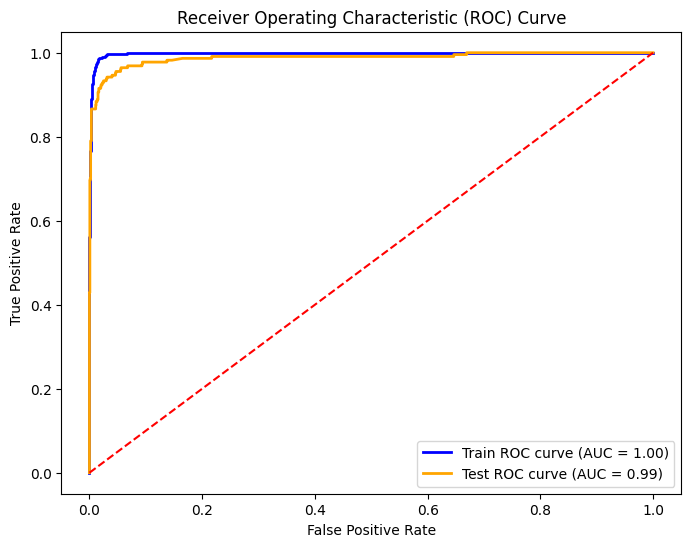

Accuracy: 0.9605263157894737
Confusion Matrix:
[[1445    3]
 [  63  161]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1448
           1       0.98      0.72      0.83       224

    accuracy                           0.96      1672
   macro avg       0.97      0.86      0.90      1672
weighted avg       0.96      0.96      0.96      1672



In [67]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

# Registra el tiempo actual antes de ejecutar el código
inicio = time.time()


# Dividir el conjunto de datos en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(sms_final.drop('label', axis=1), sms_final['label'], test_size=0.3, random_state=42)

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    sms_final.drop('Label', axis=1),
    sms_final['Label'],
    test_size=0.3,
    random_state=42,
    stratify=sms_final['Label']
)

# Inicializar y entrenar un vectorizador TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train['SMS'])
X_test_tfidf = vectorizer.transform(X_test['SMS'])

# Inicializar y entrenar un modelo de regresión logística
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_tfidf)

# Obtener las probabilidades para el conjunto de prueba y el conjunto de entrenamiento
y_probs_train = model.predict_proba(X_train_tfidf)[:, 1]
y_probs_test = model.predict_proba(X_test_tfidf)[:, 1]

# Calcular la curva ROC y el AUC para ambos conjuntos
fpr_train, tpr_train, _ = roc_curve(y_train, y_probs_train)
roc_auc_train = roc_auc_score(y_train, y_probs_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_probs_test)
roc_auc_test = roc_auc_score(y_test, y_probs_test)

# Mostrar resultados finales
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


# Registra el tiempo después de que el proceso finalice
fin = time.time()
tiempo_transcurrido_segundos = fin - inicio
print(f"El proceso tardó aproximadamente {tiempo_transcurrido_segundos:.2f} segundos.")
# Mostrar la curva ROC para el conjunto de entrenamiento y prueba
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Mostrar resultados
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

# Random Forest

El proceso tardó aproximadamente 6.43 segundos.


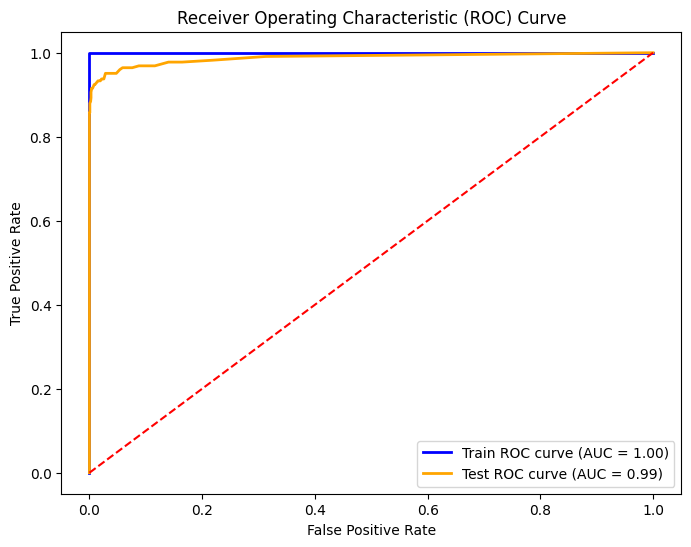

Random Forest Accuracy: 0.9760765550239234
Confusion Matrix:
[[1448    0]
 [  40  184]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1448
           1       1.00      0.82      0.90       224

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.98      1672



In [69]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import time

# Registra el tiempo actual antes de ejecutar el código
inicio = time.time()

# Dividir el conjunto de datos en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(sms_final.drop('label', axis=1), sms_final['label'], test_size=0.3, random_state=42)

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    sms_final.drop('Label', axis=1),
    sms_final['Label'],
    test_size=0.3,
    random_state=42,
    stratify=sms_final['Label']
)

# Inicializar y entrenar un vectorizador TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train['SMS'])
X_test_tfidf = vectorizer.transform(X_test['SMS'])

# Inicializar y entrenar un modelo Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_tfidf, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = model_rf.predict(X_test_tfidf)

# Obtener las probabilidades para el conjunto de prueba y el conjunto de entrenamiento
y_probs_train = model_rf.predict_proba(X_train_tfidf)[:, 1]
y_probs_test = model_rf.predict_proba(X_test_tfidf)[:, 1]

# Calcular la curva ROC y el AUC para ambos conjuntos
fpr_train, tpr_train, _ = roc_curve(y_train, y_probs_train)
roc_auc_train = roc_auc_score(y_train, y_probs_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_probs_test)
roc_auc_test = roc_auc_score(y_test, y_probs_test)

# Evaluar el rendimiento del modelo Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Registra el tiempo después de que el proceso finalice
fin = time.time()
tiempo_transcurrido_segundos = fin - inicio
print(f"El proceso tardó aproximadamente {tiempo_transcurrido_segundos:.2f} segundos.")
import matplotlib.pyplot as plt

# Mostrar la curva ROC para el conjunto de entrenamiento y prueba
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Mostrar resultados
print(f'Random Forest Accuracy: {accuracy_rf}')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('Classification Report:')
print(classification_rep_rf)

# Support Vector Machine

El proceso tardó aproximadamente 5.02 segundos.


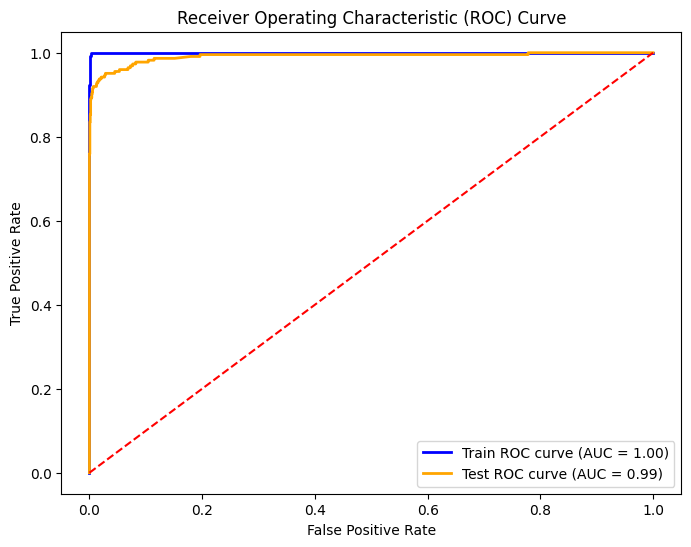

Support Vector Machine Accuracy: 0.9832535885167464
Confusion Matrix:
[[1444    4]
 [  24  200]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.98      0.89      0.93       224

    accuracy                           0.98      1672
   macro avg       0.98      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [70]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import time

# Registra el tiempo actual antes de ejecutar el código
inicio = time.time()

# Dividir el conjunto de datos en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(sms_final.drop('label', axis=1), sms_final['label'], test_size=0.3, random_state=42)

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    sms_final.drop('Label', axis=1),
    sms_final['Label'],
    test_size=0.3,
    random_state=42,
    stratify=sms_final['Label']
)

# Inicializar y entrenar un vectorizador TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train['SMS'])
X_test_tfidf = vectorizer.transform(X_test['SMS'])

# Inicializar y entrenar un modelo de Support Vector Machine (SVM)
model_svm = SVC(kernel='linear', random_state=42, probability=True)
model_svm.fit(X_train_tfidf, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_svm = model_svm.predict(X_test_tfidf)

# Obtener las probabilidades para el conjunto de prueba y el conjunto de entrenamiento
y_probs_train = model_svm.predict_proba(X_train_tfidf)[:, 1]
y_probs_test = model_svm.predict_proba(X_test_tfidf)[:, 1]

# Evaluar el rendimiento del modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Registra el tiempo después de que el proceso finalice
fin = time.time()
tiempo_transcurrido_segundos = fin - inicio
print(f"El proceso tardó aproximadamente {tiempo_transcurrido_segundos:.2f} segundos.")
import matplotlib.pyplot as plt

# Calcular la curva ROC y el AUC para ambos conjuntos
fpr_train, tpr_train, _ = roc_curve(y_train, y_probs_train)
roc_auc_train = roc_auc_score(y_train, y_probs_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_probs_test)
roc_auc_test = roc_auc_score(y_test, y_probs_test)

# Mostrar la curva ROC para el conjunto de entrenamiento y prueba
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Mostrar resultados
print(f'Support Vector Machine Accuracy: {accuracy_svm}')
print('Confusion Matrix:')
print(conf_matrix_svm)
print('Classification Report:')
print(classification_rep_svm)

# XG Boost

El proceso tardó aproximadamente 2.52 segundos.


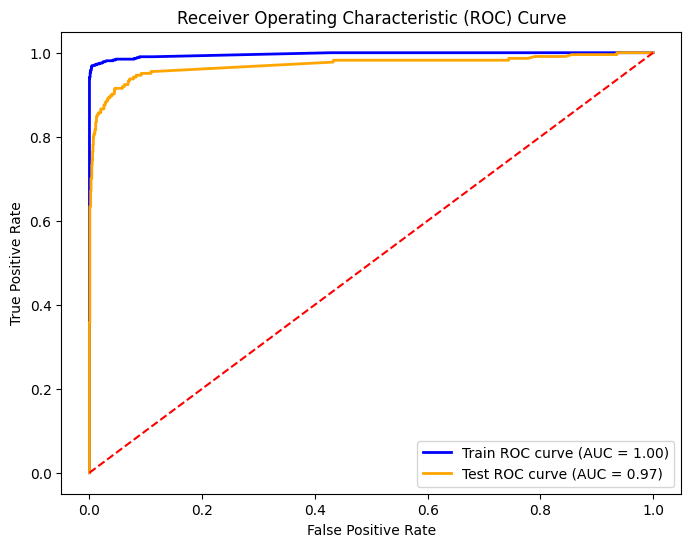

XGBoost Accuracy: 0.9671052631578947
Confusion Matrix:
[[1438   10]
 [  45  179]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1448
           1       0.95      0.80      0.87       224

    accuracy                           0.97      1672
   macro avg       0.96      0.90      0.92      1672
weighted avg       0.97      0.97      0.97      1672



In [71]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
import time

# Registra el tiempo actual antes de ejecutar el código
inicio = time.time()

# Dividir el conjunto de datos en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(sms_final.drop('label', axis=1), sms_final['label'], test_size=0.3, random_state=42)

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    sms_final.drop('Label', axis=1),
    sms_final['Label'],
    test_size=0.3,
    random_state=42,
    stratify=sms_final['Label']
)

# Inicializar y entrenar un vectorizador TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train['SMS'])
X_test_tfidf = vectorizer.transform(X_test['SMS'])

# Inicializar y entrenar un modelo de Gradient Boosting (XGBoost)
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train_tfidf, y_train)

# Realizar predicciones de probabilidad en el conjunto de entrenamiento y prueba
y_probs_train = model_xgb.predict_proba(X_train_tfidf)[:, 1]
y_probs_test = model_xgb.predict_proba(X_test_tfidf)[:, 1]

# Evaluar el rendimiento del modelo XGBoost
accuracy_xgb = accuracy_score(y_test, model_xgb.predict(X_test_tfidf))
conf_matrix_xgb = confusion_matrix(y_test, model_xgb.predict(X_test_tfidf))
classification_rep_xgb = classification_report(y_test, model_xgb.predict(X_test_tfidf))

# Registra el tiempo después de que el proceso finalice
fin = time.time()
tiempo_transcurrido_segundos = fin - inicio
print(f"El proceso tardó aproximadamente {tiempo_transcurrido_segundos:.2f} segundos.")
import matplotlib.pyplot as plt

# Calcular la curva ROC y el AUC para ambos conjuntos
fpr_train, tpr_train, _ = roc_curve(y_train, y_probs_train)
roc_auc_train = roc_auc_score(y_train, y_probs_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_probs_test)
roc_auc_test = roc_auc_score(y_test, y_probs_test)

# Mostrar la curva ROC para el conjunto de entrenamiento y prueba
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Mostrar resultados
print(f'XGBoost Accuracy: {accuracy_xgb}')
print('Confusion Matrix:')
print(conf_matrix_xgb)
print('Classification Report:')
print(classification_rep_xgb)

# Multinominal Naive Bayes

El proceso tardó aproximadamente 0.23 segundos.


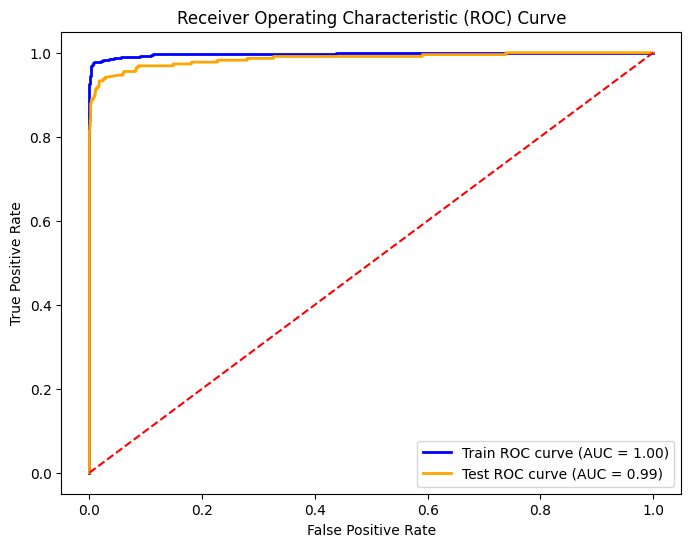

Naive Bayes Accuracy: 0.9683014354066986
Confusion Matrix:
[[1448    0]
 [  53  171]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1448
           1       1.00      0.76      0.87       224

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672



In [73]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import time

# Registra el tiempo actual antes de ejecutar el código
inicio = time.time()

# Dividir el conjunto de datos en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(sms_final.drop('label', axis=1), sms_final['label'], test_size=0.3, random_state=42)

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    sms_final.drop('Label', axis=1),
    sms_final['Label'],
    test_size=0.3,
    random_state=42,
    stratify=sms_final['Label']
)

# Inicializar y entrenar un vectorizador TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train['SMS'])
X_test_tfidf = vectorizer.transform(X_test['SMS'])

# Inicializar y entrenar un modelo de Naive Bayes (MultinomialNB)
model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)

# Realizar predicciones de probabilidad en el conjunto de entrenamiento y prueba
y_probs_train = model_nb.predict_proba(X_train_tfidf)[:, 1]
y_probs_test = model_nb.predict_proba(X_test_tfidf)[:, 1]

# Evaluar el rendimiento del modelo Naive Bayes
accuracy_nb = accuracy_score(y_test, model_nb.predict(X_test_tfidf))
conf_matrix_nb = confusion_matrix(y_test, model_nb.predict(X_test_tfidf))
classification_rep_nb = classification_report(y_test, model_nb.predict(X_test_tfidf))

# Registra el tiempo después de que el proceso finalice
fin = time.time()
tiempo_transcurrido_segundos = fin - inicio
print(f"El proceso tardó aproximadamente {tiempo_transcurrido_segundos:.2f} segundos.")
import matplotlib.pyplot as plt

# Calcular la curva ROC y el AUC para ambos conjuntos
fpr_train, tpr_train, _ = roc_curve(y_train, y_probs_train)
roc_auc_train = roc_auc_score(y_train, y_probs_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_probs_test)
roc_auc_test = roc_auc_score(y_test, y_probs_test)

# Mostrar la curva ROC para el conjunto de entrenamiento y prueba
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Mostrar resultados
print(f'Naive Bayes Accuracy: {accuracy_nb}')
print('Confusion Matrix:')
print(conf_matrix_nb)
print('Classification Report:')
print(classification_rep_nb)


# Decision Tree


El proceso tardó aproximadamente 1.42 segundos.


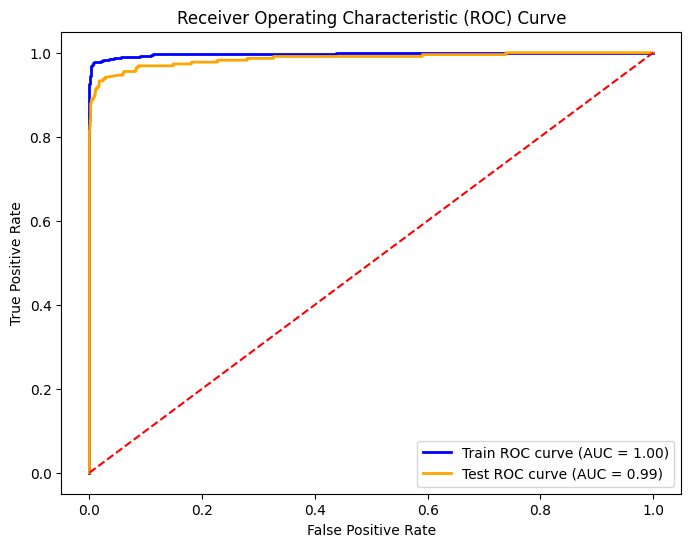

Precisión del Árbol de Decisión: 0.9635167464114832
Matriz de Confusión:
[[1420   28]
 [  33  191]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1448
           1       0.87      0.85      0.86       224

    accuracy                           0.96      1672
   macro avg       0.92      0.92      0.92      1672
weighted avg       0.96      0.96      0.96      1672



In [76]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
import time

# Registra el tiempo actual antes de ejecutar el código
inicio = time.time()

# Dividir el conjunto de datos en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(sms_final.drop('label', axis=1), sms_final['label'], test_size=0.3, random_state=42)

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    sms_final.drop('Label', axis=1),
    sms_final['Label'],
    test_size=0.3,
    random_state=42,
    stratify=sms_final['Label']
)

# Inicializar y entrenar un vectorizador TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train['SMS'])
X_test_tfidf = vectorizer.transform(X_test['SMS'])

# Inicializar y entrenar un modelo de Árbol de Decisión
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_tfidf, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_dt = model_dt.predict(X_test_tfidf)

# Evaluar el rendimiento del modelo de Árbol de Decisión
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Registra el tiempo después de que el proceso finalice
fin = time.time()
tiempo_transcurrido_segundos = fin - inicio
print(f"El proceso tardó aproximadamente {tiempo_transcurrido_segundos:.2f} segundos.")
import matplotlib.pyplot as plt

# Mostrar la curva ROC para el conjunto de entrenamiento y prueba
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Mostrar resultados
print(f'Precisión del Árbol de Decisión: {accuracy_dt}')
print('Matriz de Confusión:')
print(conf_matrix_dt)
print('Reporte de Clasificación:')
print(classification_rep_dt)


# Ada Boost

El proceso tardó aproximadamente 2.47 segundos.


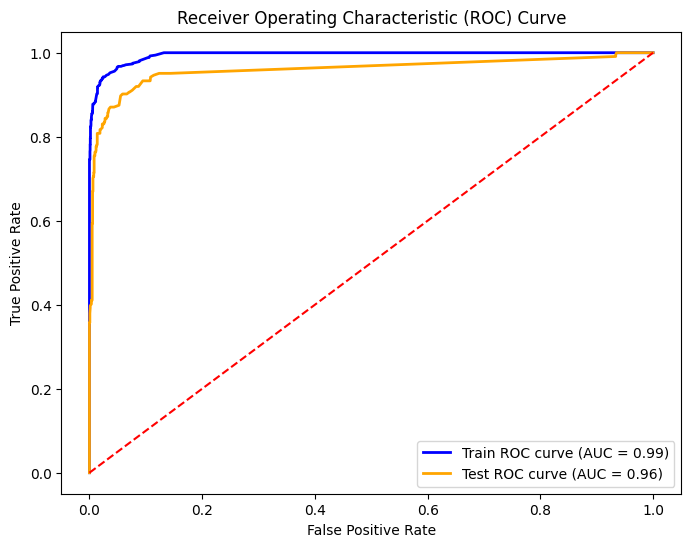

Precisión de AdaBoost: 0.9593301435406698
Matriz de Confusión:
[[1433   15]
 [  53  171]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1448
           1       0.92      0.76      0.83       224

    accuracy                           0.96      1672
   macro avg       0.94      0.88      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [78]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier
import time

# Registra el tiempo actual antes de ejecutar el código
inicio = time.time()

# Dividir el conjunto de datos en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(sms_final.drop('label', axis=1), sms_final['label'], test_size=0.3, random_state=42)

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    sms_final.drop('Label', axis=1),
    sms_final['Label'],
    test_size=0.3,
    random_state=42,
    stratify=sms_final['Label']
)

# Inicializar y entrenar un vectorizador TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train['SMS'])
X_test_tfidf = vectorizer.transform(X_test['SMS'])

# Inicializar y entrenar un modelo AdaBoost
model_ada = AdaBoostClassifier(random_state=42)
model_ada.fit(X_train_tfidf, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_ada = model_ada.predict(X_test_tfidf)

# Evaluar el rendimiento del modelo AdaBoost en el conjunto de prueba
accuracy_ada = accuracy_score(y_test, y_pred_ada)
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
classification_rep_ada = classification_report(y_test, y_pred_ada)

# Obtener las probabilidades para los conjuntos de entrenamiento y prueba
y_probs_train = model_ada.predict_proba(X_train_tfidf)[:, 1]
y_probs_test = model_ada.predict_proba(X_test_tfidf)[:, 1]

# Calcular la curva ROC y el AUC para ambos conjuntos
fpr_train, tpr_train, _ = roc_curve(y_train, y_probs_train)
roc_auc_train = roc_auc_score(y_train, y_probs_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_probs_test)
roc_auc_test = roc_auc_score(y_test, y_probs_test)

# Registra el tiempo después de que el proceso finalice
fin = time.time()
tiempo_transcurrido_segundos = fin - inicio
print(f"El proceso tardó aproximadamente {tiempo_transcurrido_segundos:.2f} segundos.")
import matplotlib.pyplot as plt

# Mostrar la curva ROC para el conjunto de entrenamiento y prueba
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Mostrar resultados
print(f'Precisión de AdaBoost: {accuracy_ada}')
print('Matriz de Confusión:')
print(conf_matrix_ada)
print('Reporte de Clasificación:')
print(classification_rep_ada)
